In [1]:
import igraph as ig
import leidenalg as la #https://leidenalg.readthedocs.io/en/latest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from igraph import Graph #https://python.igraph.org/en/stable/install.html
from modwt import modwt, modwtmra
from scipy.stats import t
from fMRI_pearson import fMRISeq
from sklearn.metrics import normalized_mutual_info_score as NMI
import pickle

In [2]:
# load data
data = loadmat(r"E:\NS\Primate fMRI\data\awake_fmri")['awake_fmri']

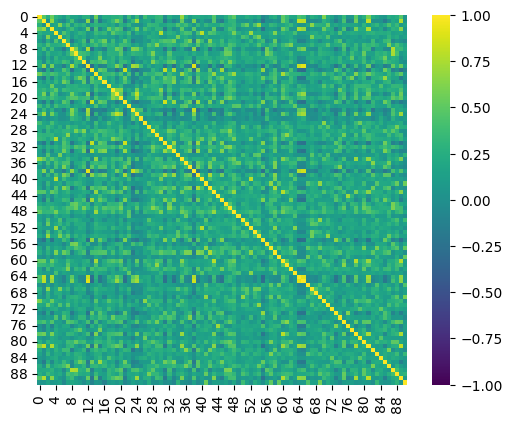

In [3]:
corr_mats_total = []
data_total = np.empty((91,1))
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data_seq = data[i,j]
        if data_seq.shape[1] < 10:
            continue
        data_total = np.hstack([data_total,data_seq])
        # initialize the fMRISeq class
        # seq_scale0 = fmri_seq.Modwt(total_level = 5,level = 2)
        # fmri_seq_scale0 = fMRISeq(seq_scale0,l_window =data_seq.shape[1],step =None)
        # # calculate the pearson correlation matrix
        # corr_mats = fmri_seq_scale0.calc_pearson_mat(wavelet_transform = False,p_val = False)
        # #corr_mats = fmri_seq.cal_corcoeff_mat(wavelet_transform = True,p_val = False)
        # corr_mats_total.append(corr_mats)
        # fmri_seq_scale0.save_results('E:\\NS\\Primate fMRI\\community\\results\\scale0_cor_%d_%d'%(i,j))
        with open('E:\\NS\\Primate fMRI\\community\\results\\scale0_cor_%d_%d'%(i,j),'rb') as f:
            fmri_seq = pickle.load(f)
        corr_mats_total.append(fmri_seq.corr_mats)
corr_mats_total = np.array(corr_mats_total)
corr_mats_mean = np.mean(corr_mats_total,axis=0)

sns.heatmap(corr_mats_mean[0,:,:],cmap='viridis', center=0, vmin=-1, vmax=1, square=True)
data_total = data_total[:,1:]

In [4]:
fmri_seq_total = fMRISeq(data_total,l_window = data_total.shape[1])
fmri_seq_total.corr_mats_p = corr_mats_mean

In [21]:
partition = fmri_seq_total.partition_full(resolution_parameter=0.75)
print(partition.membership)
membership = partition.membership
print(partition.q)
print(max(membership)+1)

[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]
0.03634048632767073
2


In [22]:
name91_str = loadmat(r"E:\NS\Primate fMRI\data\name91_str")['name91_str']
map = {}
name91_str = name91_str.reshape(-1)
name91=  [name[0] for name in name91_str]
name91[27] = "9-46v"
name91[35] = "TEam-a"
name91[81] = "TEam-p"
name91[40] = "Core"
name91[41] = "9-46d"
name91[84] = "TH-TF"
name91[49] = "PIR"
name91[58] = "INS"
name91[77] = "29-30"
name91[25] = "ProSt"
name91[63] = "Pi"
for i in range(91):
    name = name91[i]
    community = membership[i]
    map[name] = (community)

import json
json_map0 = json.dumps(map)
print(json_map0)

{"SUB": 1, "TEOm": 1, "13": 0, "TEpd": 1, "LB": 0, "11": 0, "7B": 0, "F5": 0, "V3A": 1, "V6A": 1, "31": 0, "VIP": 0, "V3": 1, "F1": 0, "STPi": 1, "23": 0, "AIP": 0, "TEpv": 1, "SII": 1, "V4t": 1, "MST": 1, "3": 0, "TEav": 0, "V1": 1, "MT": 1, "ProSt": 1, "PERI": 1, "9-46v": 1, "MIP": 0, "44": 1, "PBc": 0, "1": 0, "7A": 0, "5": 0, "10": 0, "TEam-a": 1, "OPRO": 0, "7op": 0, "V2": 1, "2": 0, "Core": 0, "9-46d": 0, "ProM": 0, "STPc": 1, "24a": 0, "F2": 0, "DP": 1, "LIP": 1, "PBr": 0, "PIR": 0, "46v": 0, "OPAI": 0, "MB": 0, "32": 0, "12": 0, "F3": 0, "V6": 1, "8B": 0, "INS": 0, "24c": 0, "PGa": 1, "45B": 1, "F4": 0, "Pi": 0, "TEO": 1, "V4": 1, "F6": 0, "14": 0, "25": 0, "46d": 0, "TEad": 1, "45A": 0, "STPr": 0, "24d": 0, "TPt": 0, "8l": 1, "24b": 0, "29-30": 0, "IPa": 1, "ENTO": 0, "8m": 0, "TEam-p": 1, "Gu": 0, "F7": 0, "TH-TF": 0, "7m": 0, "POLE": 0, "PIP": 1, "8r": 1, "FST": 1, "9": 0}


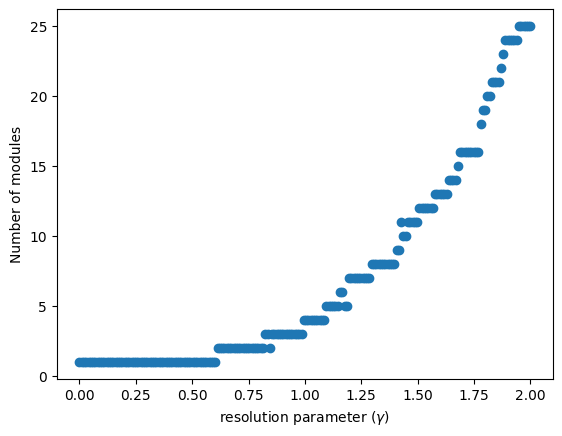

Text(0, 0.5, 'Modularity (Q)')

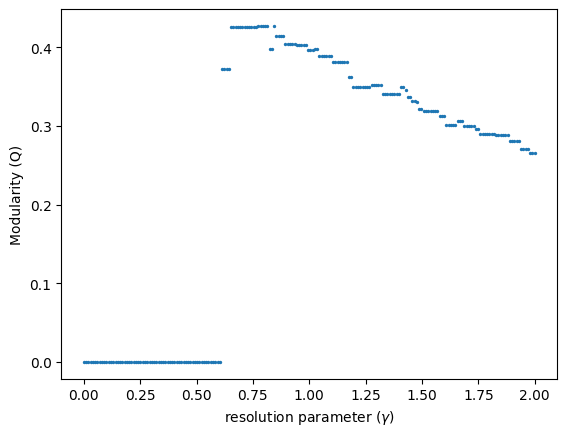

In [23]:
gamma_array = np.linspace(0,2,200)
num_module = []
q_value = []
for gamma in gamma_array:
    partition = fmri_seq_total.partition_full(resolution_parameter= gamma)
    membership = partition.membership
    num_module.append(max(membership)+1)
    q_value.append(partition.q-fmri_seq_total.partition_neg_result.q)
plt.scatter(gamma_array,num_module)
plt.xlabel(r"resolution parameter ($\gamma$)")
plt.ylabel("Number of modules")
plt.show()
plt.scatter(gamma_array,q_value,s=2)
plt.xlabel(r"resolution parameter ($\gamma$)")
plt.ylabel("Modularity (Q)")


In [24]:
fmri_seq_total.partition_neg_result.q

-0.2574093634905467